In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

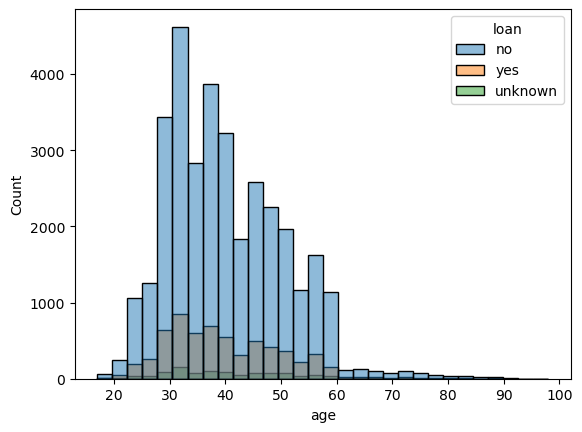

In [9]:
#df['age'].plot(kind='hist')
sns.histplot(data=df,x='age',bins=30, hue='loan')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pdays', ylabel='Count'>

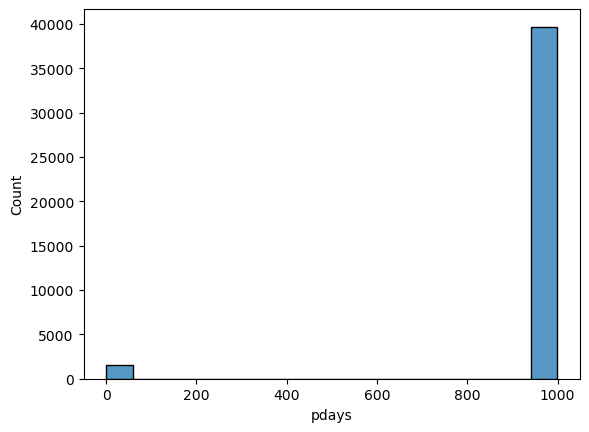

In [10]:
sns.histplot(data=df,x='pdays')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pdays', ylabel='Count'>

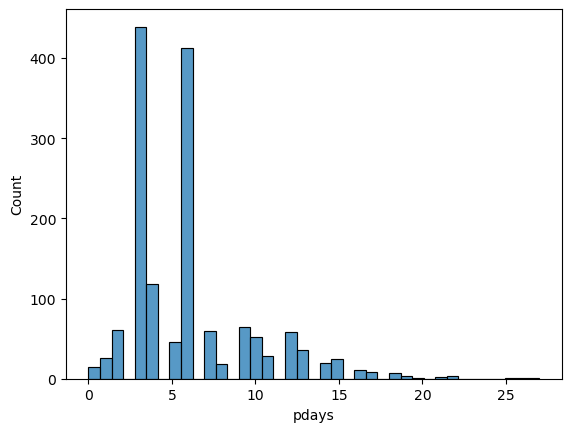

In [11]:
sns.histplot(data=df[df['pdays']!= 999],x='pdays')

In [12]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


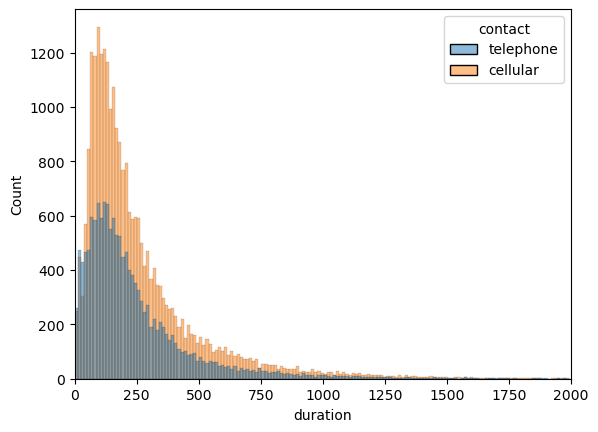

In [17]:
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000);

In [18]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

<Axes: xlabel='previous', ylabel='count'>

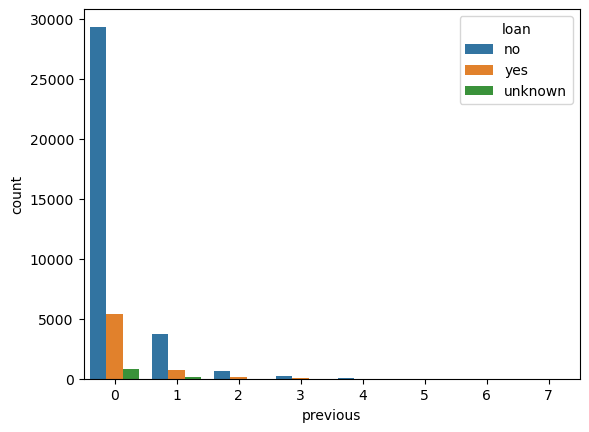

In [22]:
sns.countplot(data=df,x='previous', hue='loan')

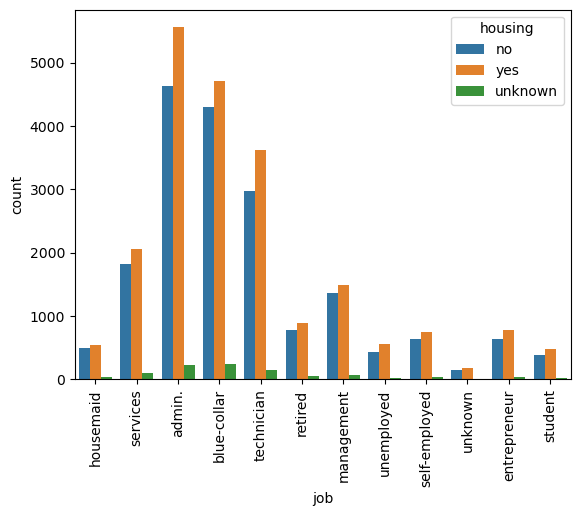

In [30]:
sns.countplot(data=df,x='job',hue='housing')
plt.xticks(rotation=90);

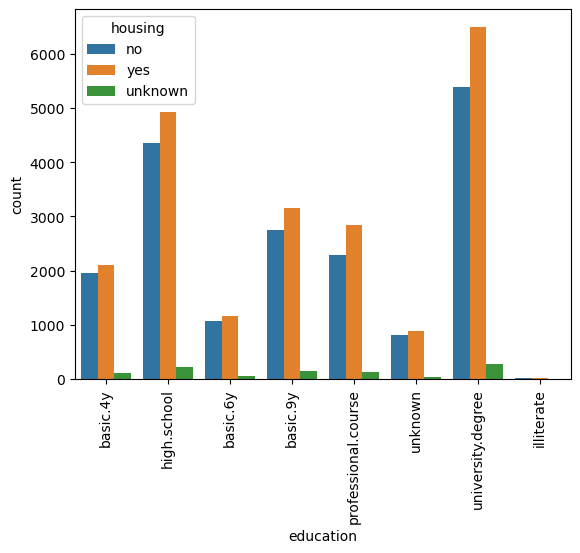

In [31]:
sns.countplot(data=df,x='education',hue='housing')
plt.xticks(rotation=90);

In [32]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

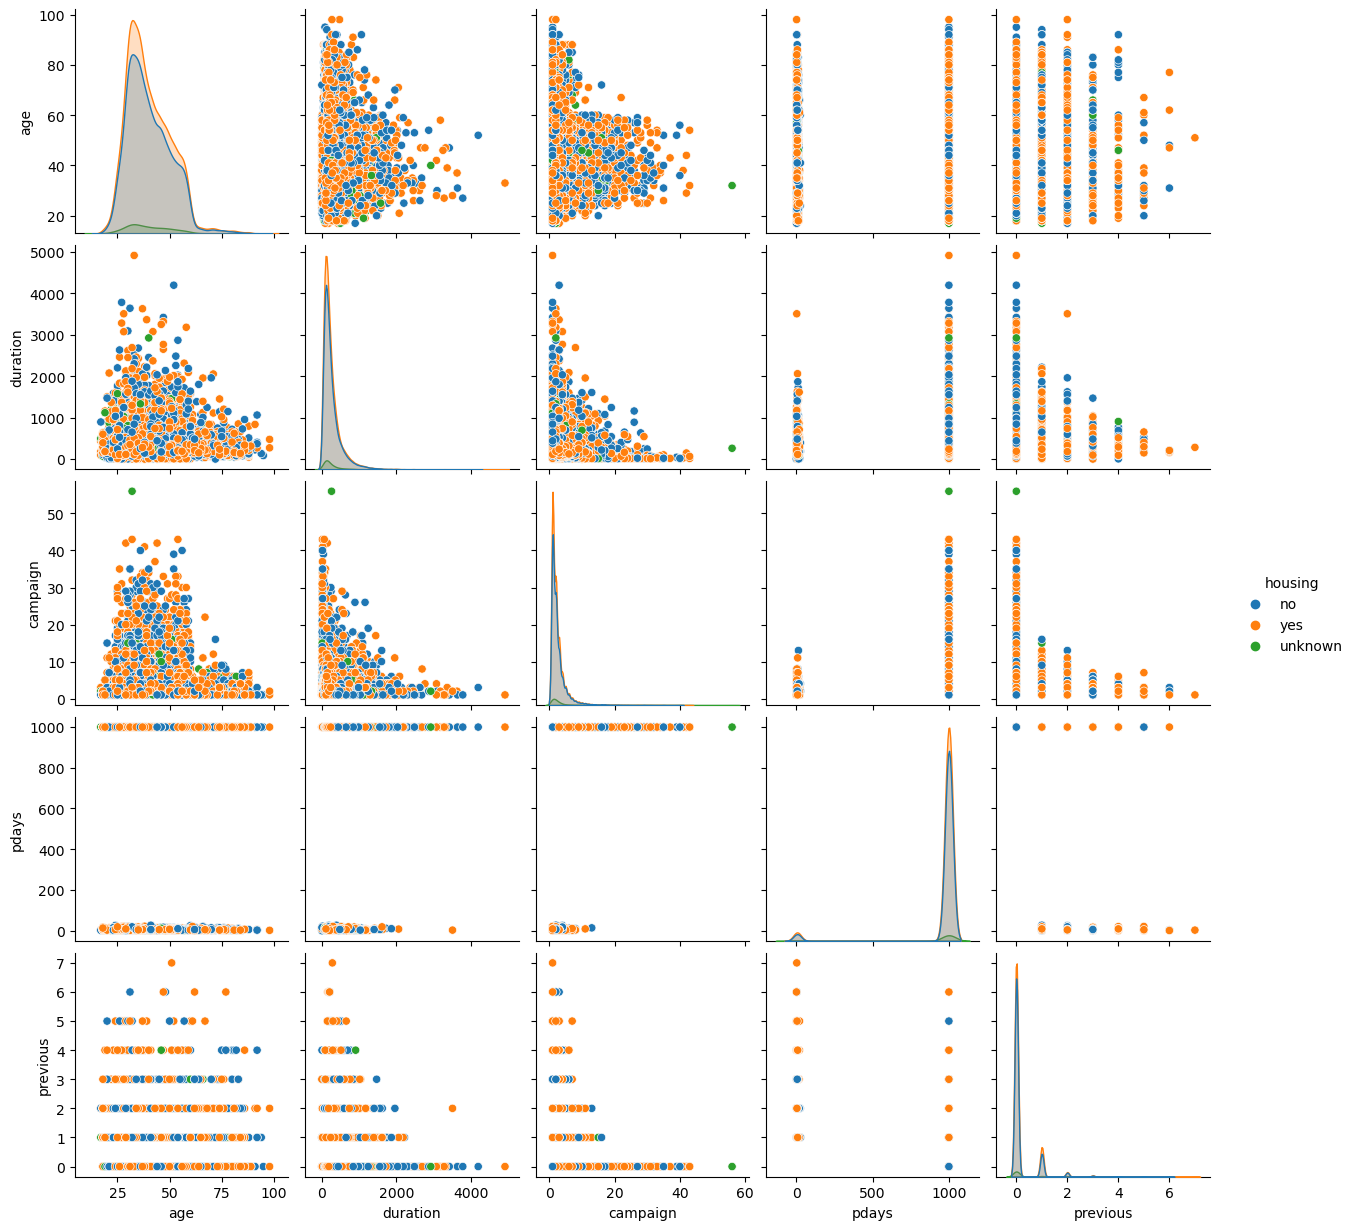

In [35]:
sns.pairplot(df[['age','duration','campaign','pdays','previous','housing']], hue = 'housing')

## Clustering

In [38]:
X = pd.get_dummies(df)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [81]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6,n_init='auto') #,random_state=101)
X['labels'] = model.fit_predict(scaled_X)

In [82]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,labels
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1


In [83]:
X.corr()['labels']

age                    -0.038056
duration               -0.003524
campaign               -0.042438
pdays                   0.128381
previous               -0.212441
                          ...   
poutcome_nonexistent    0.236027
poutcome_success       -0.120914
subscribed_no          -0.074482
subscribed_yes          0.074482
labels                  1.000000
Name: labels, Length: 66, dtype: float64

In [85]:
X['labels'].value_counts()

labels
1    12242
5     8260
4     7962
3     6685
2     5321
0      718
Name: count, dtype: int64

<Axes: >

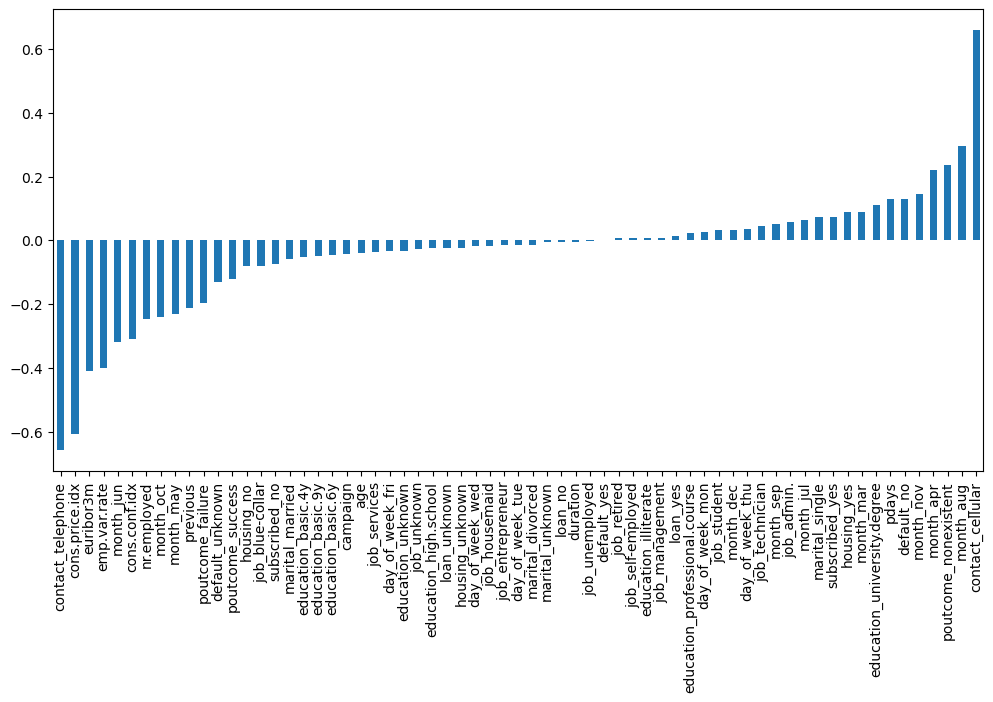

In [84]:
plt.figure(figsize=(12,6))
X.corr()['labels'].iloc[:-1].sort_values().plot(kind='bar')

### Choosing a K value

In [69]:
ssd = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(scaled_X)
    ssd.append(kmeans.inertia_) 
#Sum of Sqaured distances of samples to their closest cluster center

Text(0, 0.5, 'Sum of Squared Distance')

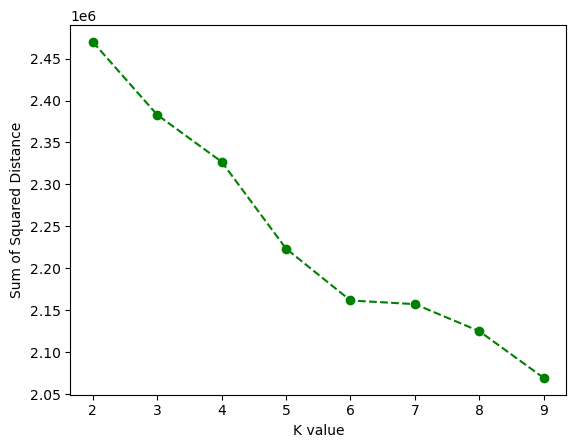

In [72]:
plt.plot(range(2,10),ssd,'go--')
plt.xlabel('K value')
plt.ylabel('Sum of Squared Distance')

In [73]:
ssd

[2469792.3673020764,
 2382895.7722850693,
 2326991.9750885796,
 2223532.5765169533,
 2161795.830115295,
 2157432.3223944623,
 2125208.4400018067,
 2069539.9394096017]

<Axes: >

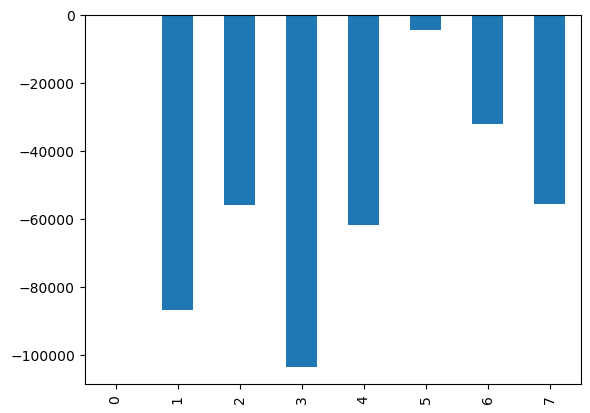

In [76]:
pd.Series(ssd).diff().plot(kind='bar')